In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
archivo = 'clean_data.csv'

df = pd.read_csv(archivo)


In [3]:
df

,Date,Country,State,Activity,Sex,Age,Deceased,standarized_country,Month,Year,Decade,Season
0,2022-09-01,south africa,WESTERN CAPE PROVINCE,swimming,F,39.0,Y,South Africa,September,2022.0,2020.0,Spring
1,2022-09-01,bahamas,NaN,diving,F,58.0,Y,Bahamas,September,2022.0,2020.0,Autumn
2,2022-09-01,usa,HAWAII,swimming,F,51.0,N,United States,September,2022.0,2020.0,Autumn
3,2022-08-01,australia,NEW SOUTH WALES,surfing,M,14.0,N,Australia,August,2022.0,2020.0,Winter
4,2022-08-01,australia,NEW SOUTH WALES,kayaking,M,NaN,N,Australia,August,2022.0,2020.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
6376,NaN,italy,SARDINIA,swimming,M,NaN,Y,Italy,NaN,NaN,NaN,Unknown
6377,1703-03-01,barbados,SOUTHWEST COAST,swimming,M,19.0,N,Barbados,March,1703.0,1700.0,Spring
6378,NaN,france,NaN,Unspecific,M,NaN,Y,France,NaN,NaN,NaN,Unknown
6379,NaN,france,CÔTE D'AZUR,Unspecific,M,NaN,N,France,NaN,NaN,NaN,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6381 entries, 0 to 6380
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 5975 non-null   object 
 1   Country              6358 non-null   object 
 2   State                6008 non-null   object 
 3   Activity             6381 non-null   object 
 4   Sex                  6381 non-null   object 
 5   Age                  3672 non-null   float64
 6   Deceased             6381 non-null   object 
 7   standarized_country  6381 non-null   object 
 8   Month                5975 non-null   object 
 9   Year                 5975 non-null   float64
 10  Decade               5975 non-null   float64
 11  Season               6381 non-null   object 
dtypes: float64(3), object(9)
memory usage: 598.3+ KB


In [5]:
# Convertir la columna 'Date' a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df_copia = df.copy()
df_copia

,Date,Country,State,Activity,Sex,Age,Deceased,standarized_country,Month,Year,Decade,Season
0,2022-09-01,south africa,WESTERN CAPE PROVINCE,swimming,F,39.0,Y,South Africa,September,2022.0,2020.0,Spring
1,2022-09-01,bahamas,NaN,diving,F,58.0,Y,Bahamas,September,2022.0,2020.0,Autumn
2,2022-09-01,usa,HAWAII,swimming,F,51.0,N,United States,September,2022.0,2020.0,Autumn
3,2022-08-01,australia,NEW SOUTH WALES,surfing,M,14.0,N,Australia,August,2022.0,2020.0,Winter
4,2022-08-01,australia,NEW SOUTH WALES,kayaking,M,NaN,N,Australia,August,2022.0,2020.0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
6376,NaT,italy,SARDINIA,swimming,M,NaN,Y,Italy,NaN,NaN,NaN,Unknown
6377,1703-03-01,barbados,SOUTHWEST COAST,swimming,M,19.0,N,Barbados,March,1703.0,1700.0,Spring
6378,NaT,france,NaN,Unspecific,M,NaN,Y,France,NaN,NaN,NaN,Unknown
6379,NaT,france,CÔTE D'AZUR,Unspecific,M,NaN,N,France,NaN,NaN,NaN,Unknown


In [49]:
df_copia = df.copy()

## Tasa de mortalidad

In [62]:
fallecidos = df_copia[df_copia['Deceased'] == 'Y'].shape[0]
fallecidos

1319

In [63]:
total_incidentes =df_copia[df_copia['Deceased'] != 'UNKNOWN'].shape[0]
total_incidentes

5824

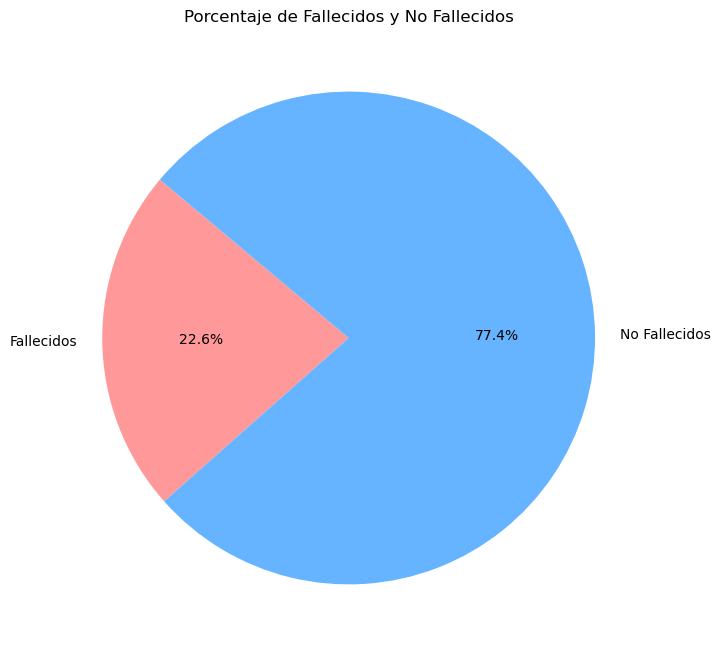

In [65]:
# Calcular los porcentajes
porcentaje_fallecidos = (fallecidos / total_incidentes) * 100
porcentaje_no_fallecidos = ((total_incidentes - fallecidos)/ total_incidentes) * 100

# Datos para el gráfico de pastel
labels = ['Fallecidos', 'No Fallecidos']
sizes = [porcentaje_fallecidos, porcentaje_no_fallecidos]
colors = ['#ff9999','#66b3ff']

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Porcentaje de Fallecidos y No Fallecidos')
plt.show()

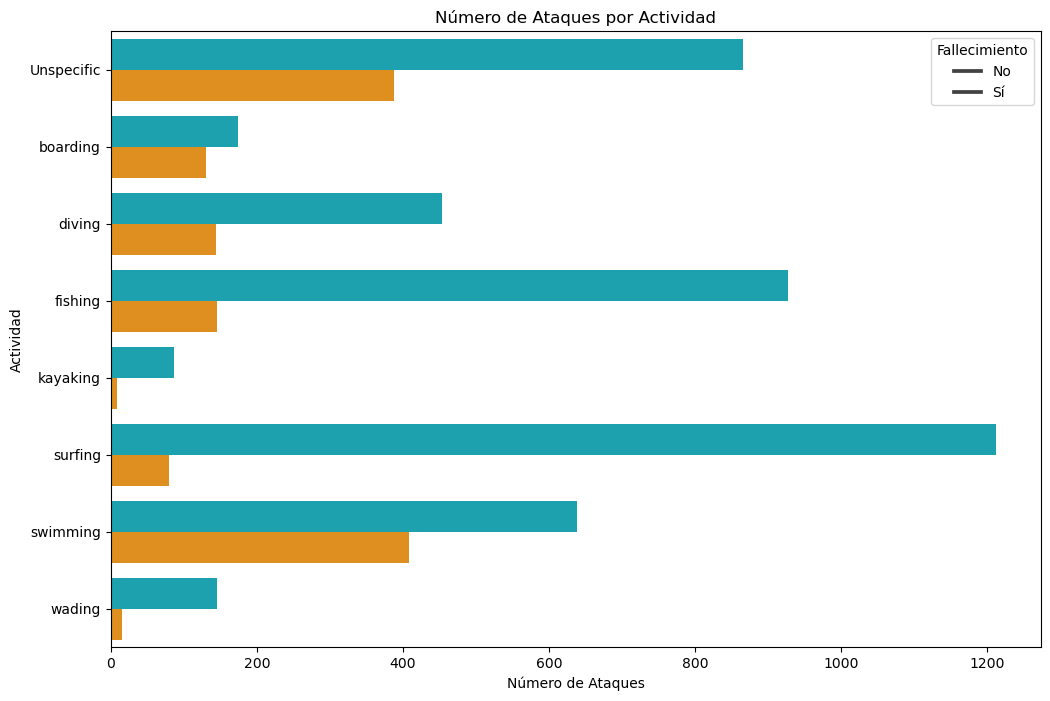

In [34]:

df_sin_unknown = df_copia[df_copia['Deceased'].isin(['Y', 'N'])]
# Contar ataques por actividad y mortalidad
activity_attacks = df_sin_unknown.groupby(['Activity', 'Deceased'], as_index=False).size().rename(columns={'size': 'Number of Attacks'})

# Crear el gráfico de barras horizontales
plt.figure(figsize=(12, 8))
sns.barplot(data=activity_attacks, y='Activity', x='Number of Attacks', hue='Deceased', 
            palette={'Y': '#FF9300', 'N': '#06B5C7'})
plt.title('Número de Ataques por Actividad')
plt.xlabel('Número de Ataques')
plt.ylabel('Actividad')
plt.legend(title='Fallecimiento', labels=['No', 'Sí'])
plt.show()

C:\Users\Laura Ortiz\AppData\Local\Temp\ipykernel_28240\1486945855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decade['Decade'] = df_decade['Decade'].astype(int)


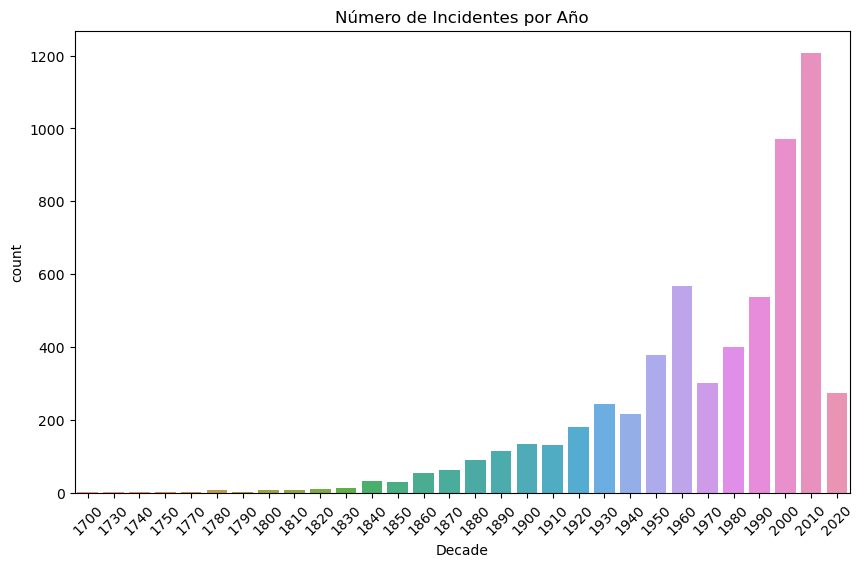

In [30]:
# Tendencia de Incidentes por Año
plt.figure(figsize=(10, 6))
df_decade = df_copia.dropna(subset=['Decade'])
df_decade['Decade'] = df_decade['Decade'].astype(int)
sns.countplot(data=df_decade, x='Decade')
plt.title('Número de Incidentes por Año')
plt.xticks(rotation=45)
plt.show()

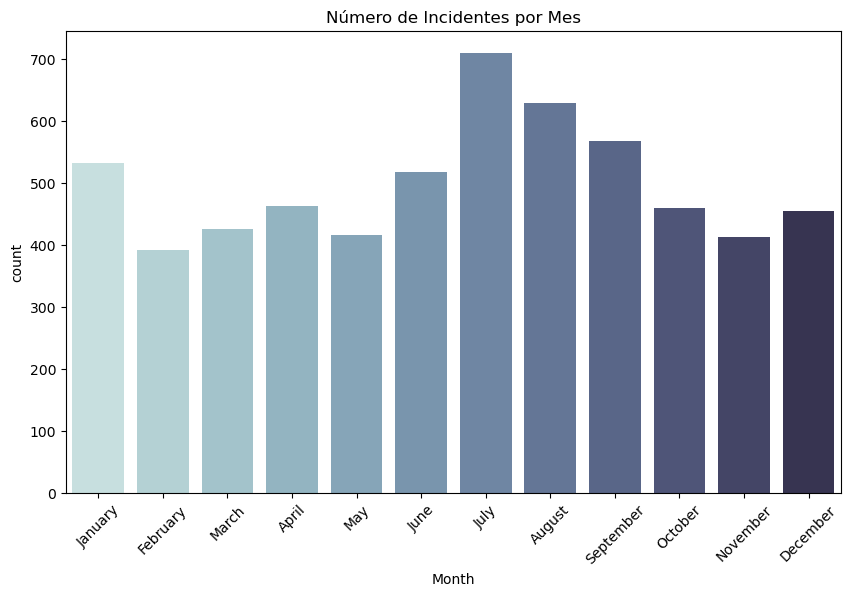

In [48]:
# Crear un nuevo DataFrame con el orden correcto de los meses
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df_copia['Month'] = pd.Categorical(df_copia['Month'], categories=meses_ordenados, ordered=True)

# Definir una paleta de colores
paleta_colores_azul = sns.color_palette("ch:start=.2,rot=-.3", n_colors=len(df_copia['Month'].unique()))

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df_copia, x='Month', palette=paleta_colores_azul)
plt.title('Número de Incidentes por Mes')
plt.xticks(rotation=45) 
plt.show()

In [75]:
# Filtrar los datos para eliminar los valores "Unknown" en la columna 'Season'
df_filtrado = df_copia[df_copia['Season'] != 'Unknown']

# Contar el número de incidentes por estación
incidentes_por_estacion = df_filtrado['Season'].value_counts()

# Calcular el porcentaje de incidentes por estación
porcentaje_por_estacion = (incidentes_por_estacion / incidentes_por_estacion.sum()) * 100

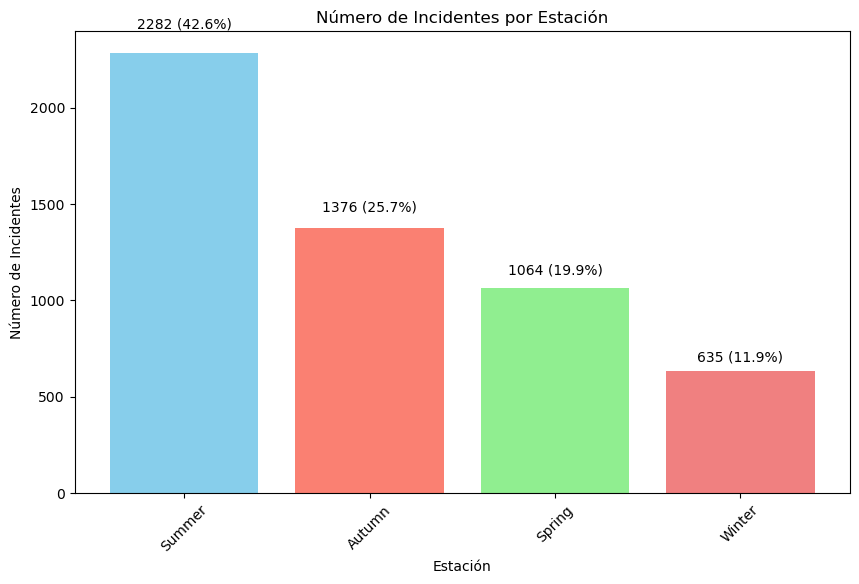

In [76]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(incidentes_por_estacion.index, incidentes_por_estacion, color=['skyblue', 'salmon', 'lightgreen', 'lightcoral'])

# Añadir los porcentajes sobre las barras
for bar in bars:
    yval = bar.get_height()
    porcentaje = (yval / incidentes_por_estacion.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + 0.05 * yval, 
        f'{yval} ({porcentaje:.1f}%)',
        ha='center', 
        va='bottom'
    )

plt.xlabel('Estación')
plt.ylabel('Número de Incidentes')
plt.title('Número de Incidentes por Estación')
plt.xticks(rotation=45)  # Rotar etiquetas del eje X si es necesario
plt.show()

In [68]:
# Contar el número de incidentes por género
incidentes_por_genero = df_copia['Sex'].value_counts()

# Calcular el porcentaje de incidentes por género
porcentaje_por_genero = (incidentes_por_genero / incidentes_por_genero.sum()) * 100

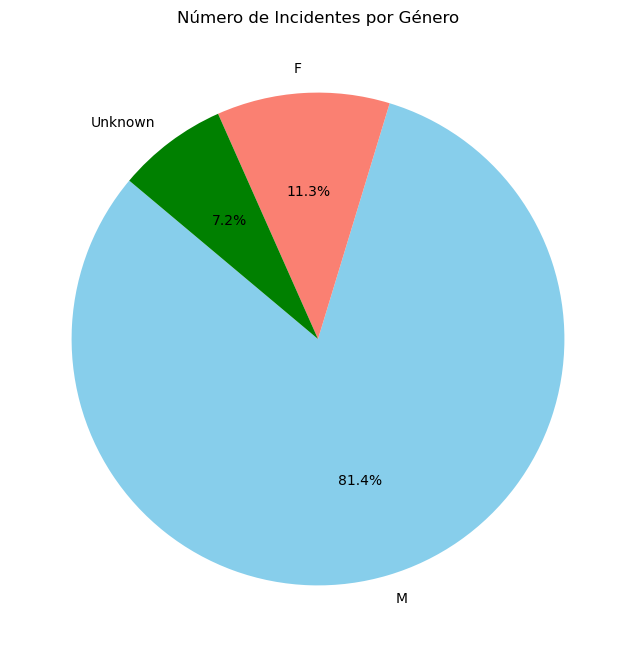

In [71]:
# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
plt.pie(
    incidentes_por_genero,
    labels=[f'{gen}' for gen, porcentaje in zip(incidentes_por_genero.index, porcentaje_por_genero)],
    autopct='%1.1f%%',
    colors=['skyblue', 'salmon', 'green'],
    startangle=140
)

# Añadir título
plt.title('Número de Incidentes por Género')
plt.show()

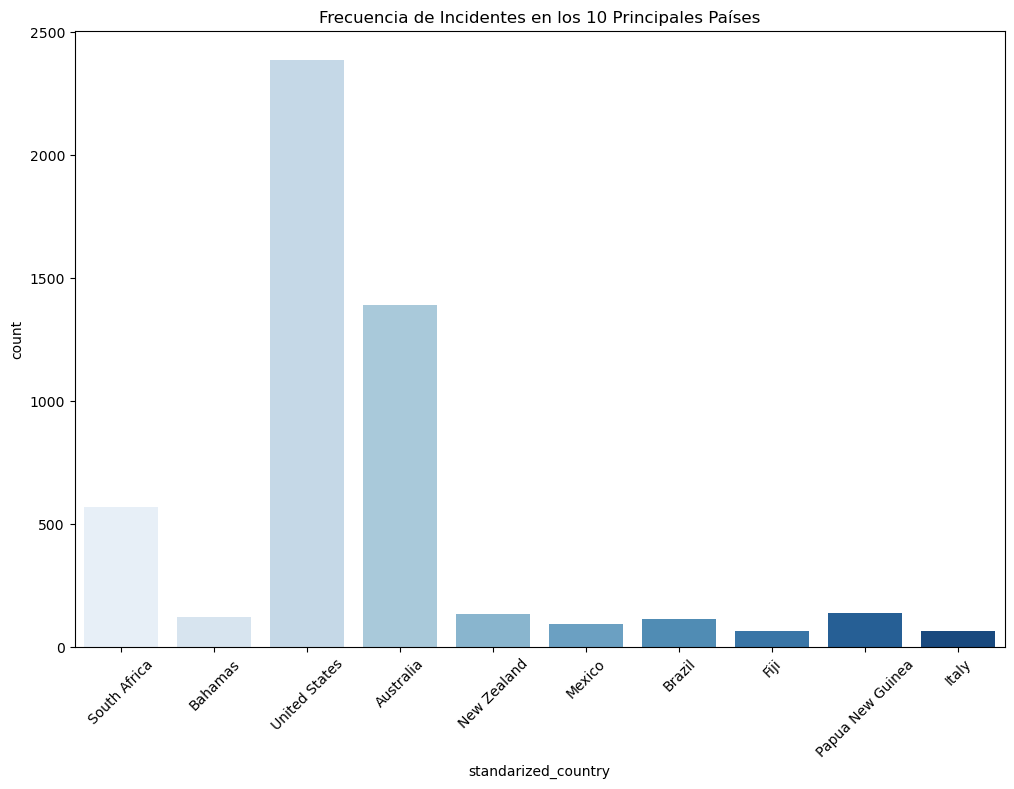

In [78]:
# PRUEBA CUARTO GRÁFICO
# La mejor opción es hacer un top 10

top_n = 10  # Número de países más frecuentes a mostrar
top_countries = df['standarized_country'].value_counts().head(top_n).index
filtered_df = df[df['standarized_country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_df, x='standarized_country', palette=sns.color_palette("Blues", top_n))
plt.title(f'Frecuencia de Incidentes en los {top_n} Principales Países')
plt.xticks(rotation=45)
plt.show()

In [83]:
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '60+']
# Crear una nueva columna con los rangos de edad
df_copia['AgeGroup'] = pd.cut(df_copia['Age'], bins=bins, labels=labels, right=False)

# Contar el número de incidentes por rango de edad
incidentes_por_edad = df_copia['AgeGroup'].value_counts().sort_index()

# Calcular el porcentaje de incidentes por rango de edad
porcentaje_por_edad = (incidentes_por_edad / incidentes_por_edad.sum()) * 100

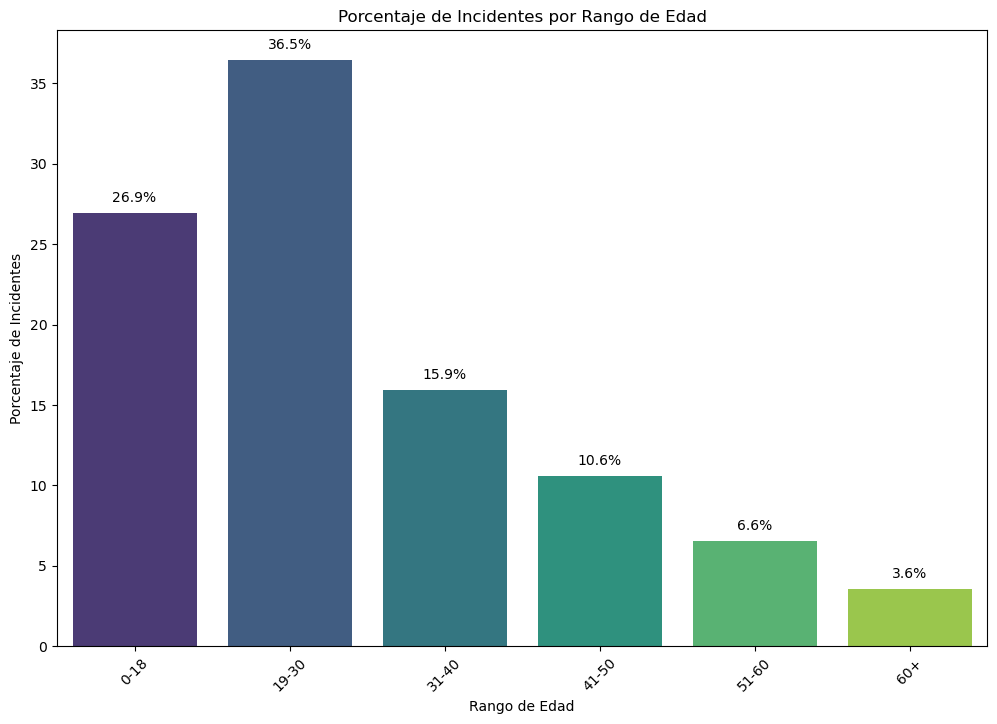

In [85]:
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=incidentes_por_edad.index, y=porcentaje_por_edad, palette='viridis')

# Añadir los porcentajes sobre las barras
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        yval + 0.5, 
        f'{yval:.1f}%',  # Mostrar solo el porcentaje
        ha='center', 
        va='bottom'
    )

plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje de Incidentes')
plt.title('Porcentaje de Incidentes por Rango de Edad')
plt.xticks(rotation=45)
plt.show()

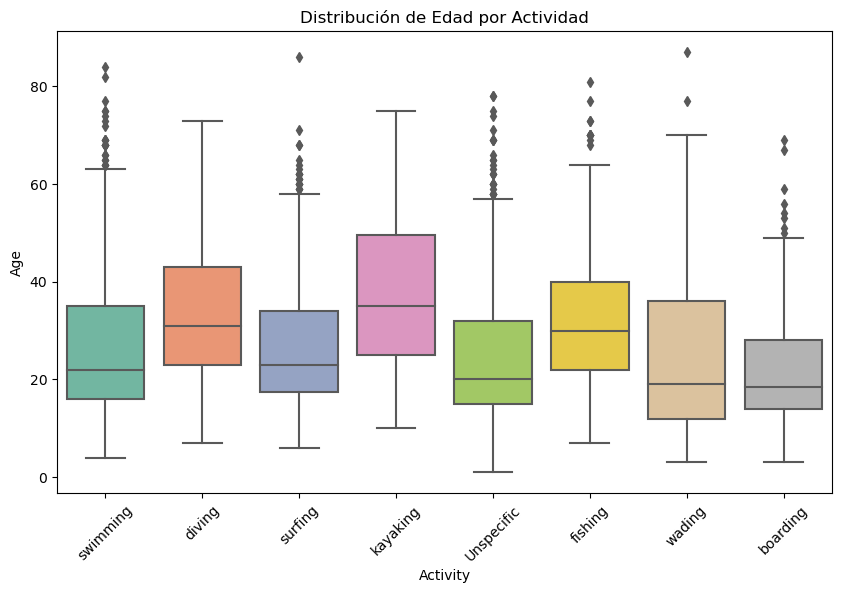

In [46]:
# Boxplot de edad por actividad
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Activity', y='Age', palette=sns.color_palette("Set2", 8))
plt.title('Distribución de Edad por Actividad')
plt.xticks(rotation=45)
plt.show()

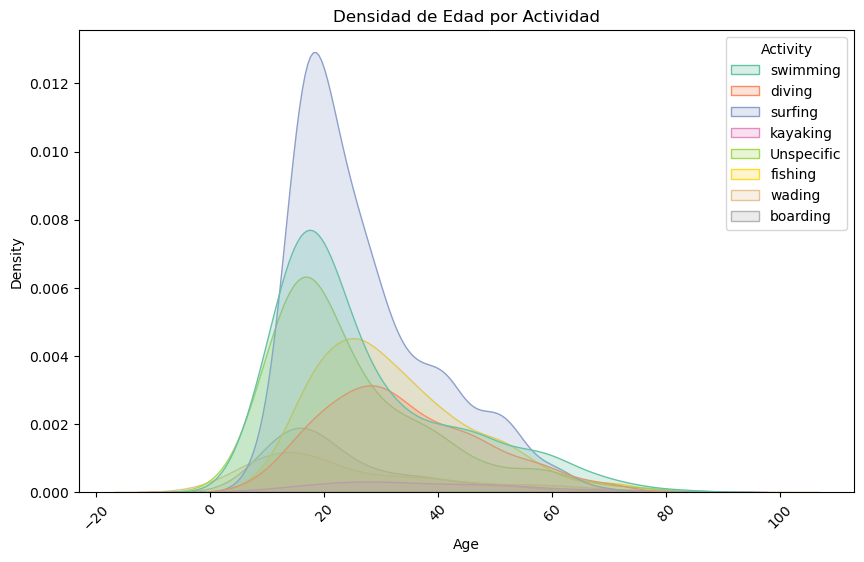

In [45]:
# PRUEBA TERCER GRÁFICO

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Activity', fill=True, palette=sns.color_palette("Set2", 8))
plt.title('Densidad de Edad por Actividad')
plt.xticks(rotation=45)
plt.show()

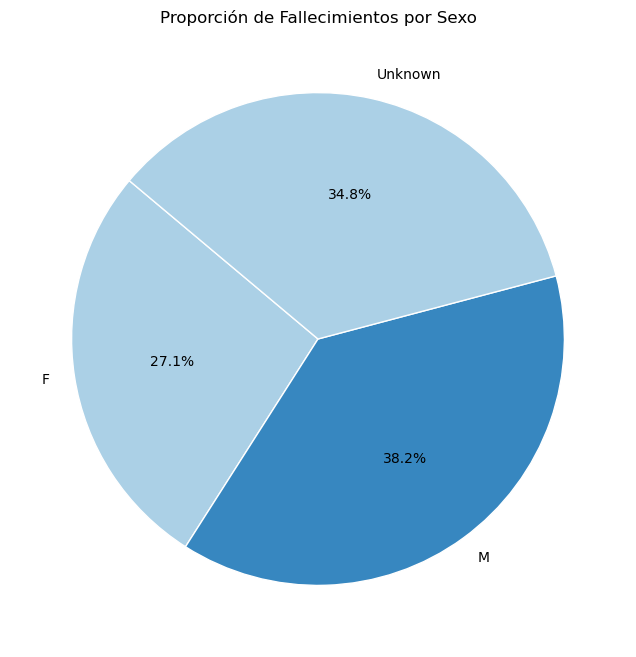

In [29]:
# PRUEBA SEXTO GRÁFICO

# Calcular la proporción de fallecimientos por sexo
sex_death_ratio = df.groupby('Sex')['Deceased'].mean().reset_index()

# Definir una paleta de colores azul
paleta_azul = sns.color_palette("Blues", 2)

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(sex_death_ratio['Deceased'], labels=sex_death_ratio['Sex'], autopct='%1.1f%%', 
        startangle=140, colors=paleta_azul, wedgeprops=dict(edgecolor='w'))
plt.title('Proporción de Fallecimientos por Sexo')
plt.show()

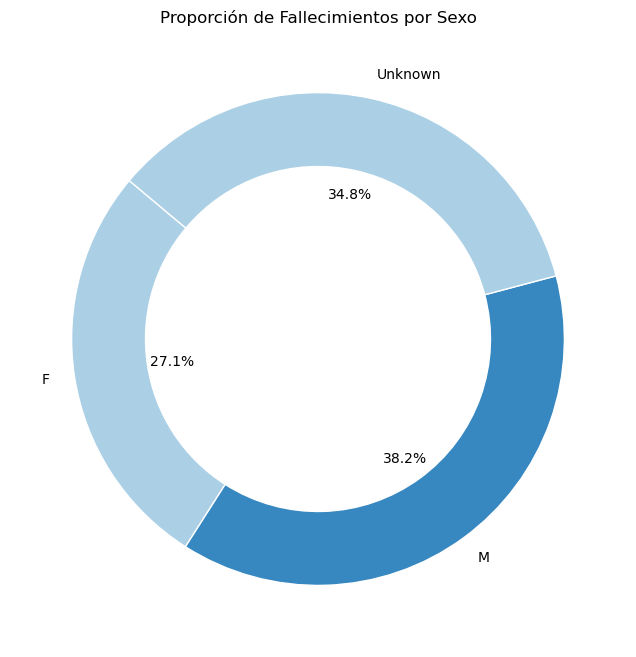

In [31]:
# PRUEBA 2 SEXTO GRÁFICO
from matplotlib.patches import Wedge

# Crear el gráfico de donut
plt.figure(figsize=(8, 8))
plt.pie(sex_death_ratio['Deceased'], labels=sex_death_ratio['Sex'], autopct='%1.1f%%', 
        startangle=140, colors=sns.color_palette("Blues", 2), wedgeprops=dict(width=0.3, edgecolor='w'))
plt.title('Proporción de Fallecimientos por Sexo')
plt.show()

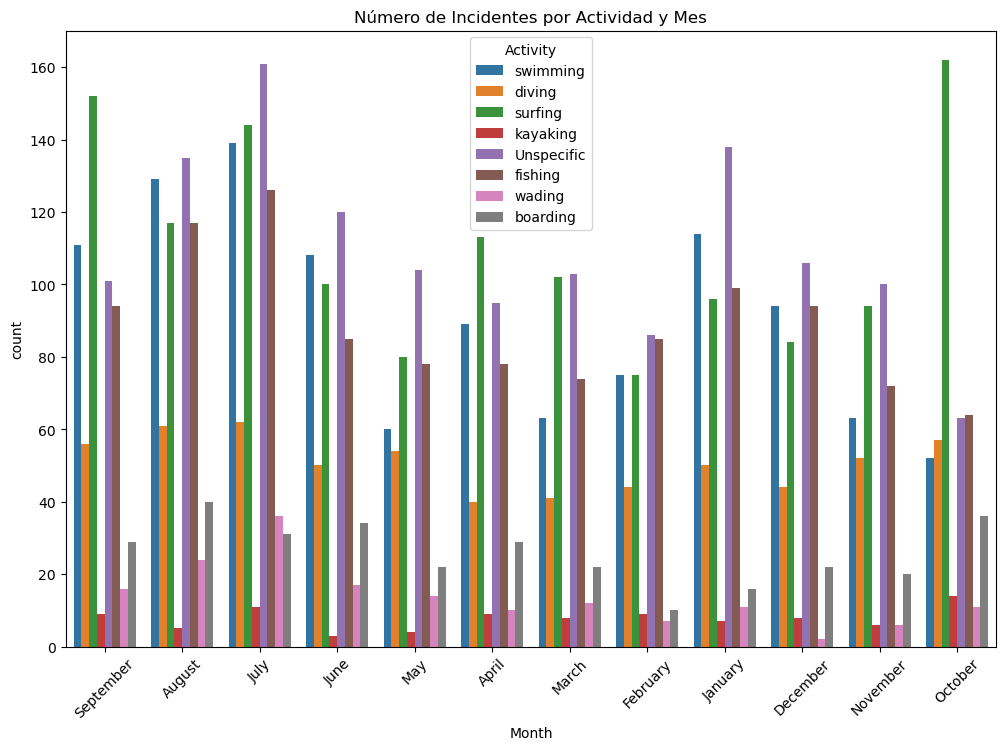

In [16]:
# Número de Incidentes por Actividad y Mes
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Activity')
plt.title('Número de Incidentes por Actividad y Mes')
plt.xticks(rotation=45)
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/341592961.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  activity_monthly = df.groupby(['Month', 'Activity']).size().unstack().fillna(0)


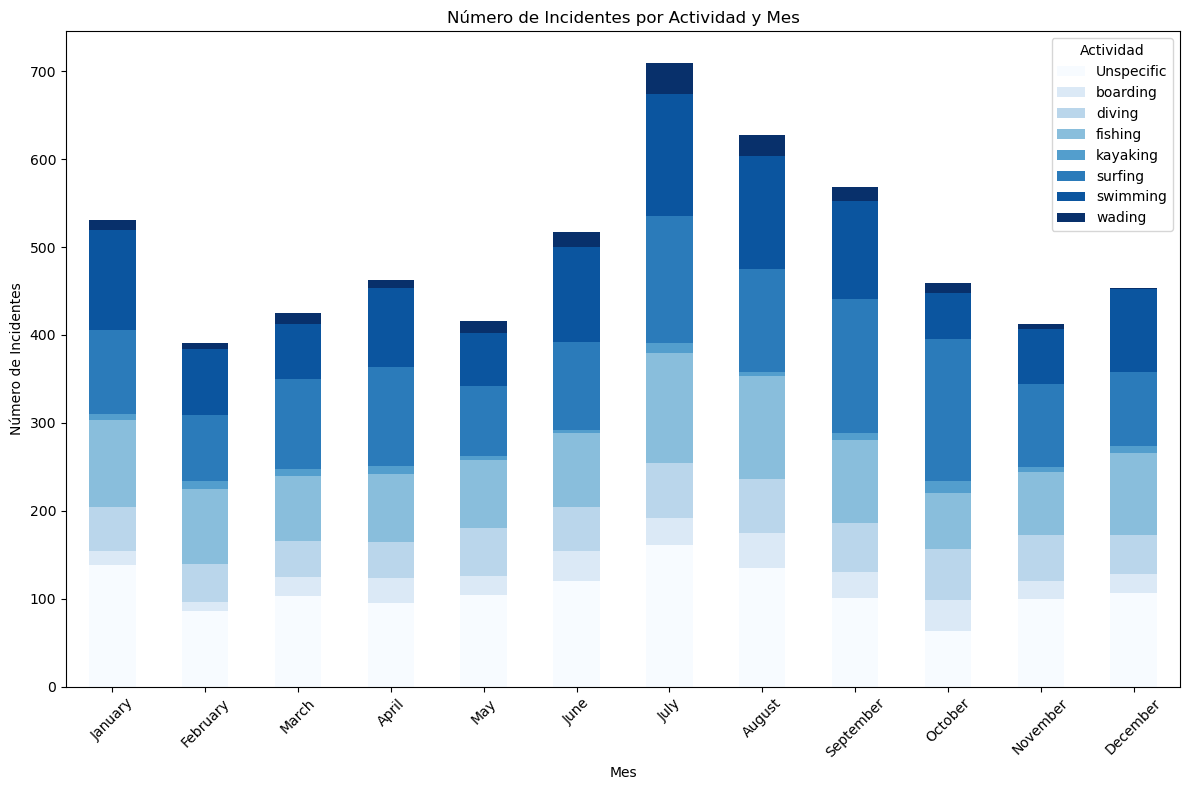

In [32]:
# PRUEBA SEPTIMO GRÁFICO

# Contar incidentes por actividad y mes
activity_monthly = df.groupby(['Month', 'Activity']).size().unstack().fillna(0)

# Crear el gráfico de barras apiladas
activity_monthly.plot(kind='bar', stacked=True, colormap='Blues', figsize=(12, 8))
plt.title('Número de Incidentes por Actividad y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Actividad')
plt.tight_layout()
plt.show()

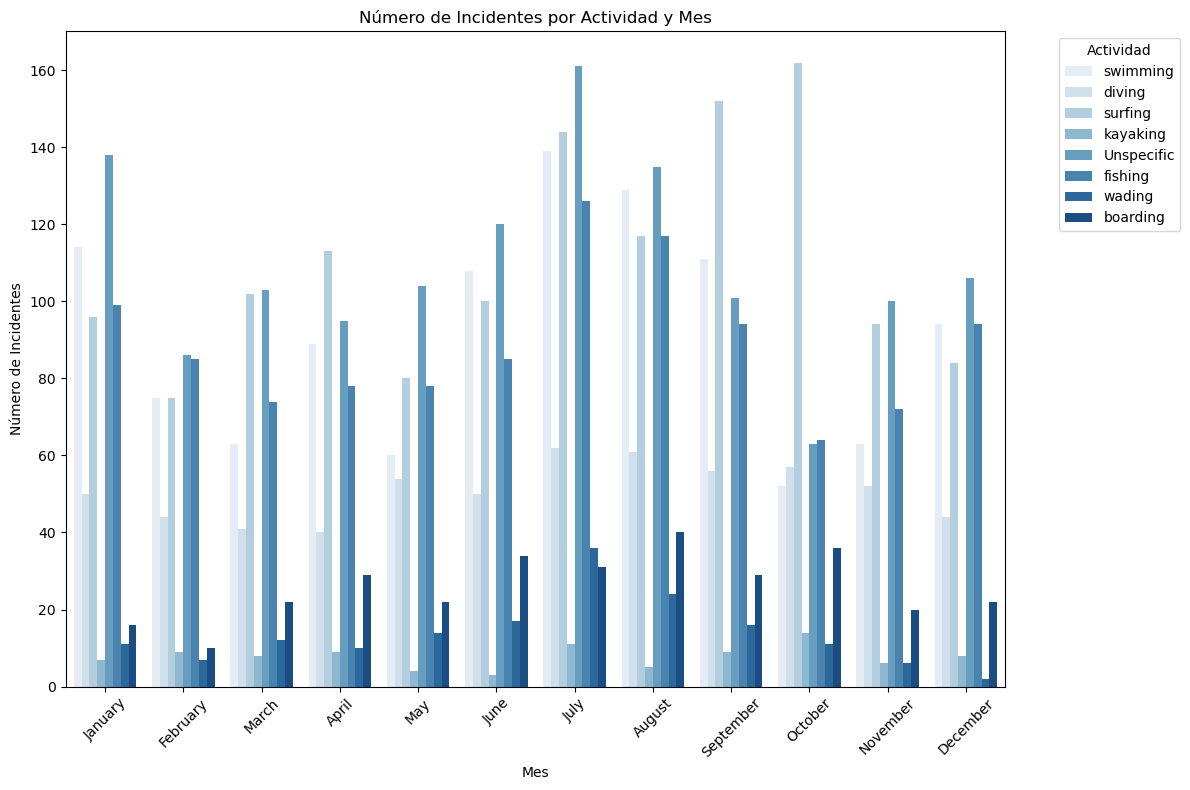

In [36]:
# PRUEBA 2 SEPTIMO GRÁFICO

# Crear el gráfico de barras con paleta de colores azul
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Month', hue='Activity', palette='Blues')
plt.title('Número de Incidentes por Actividad y Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.legend(title='Actividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

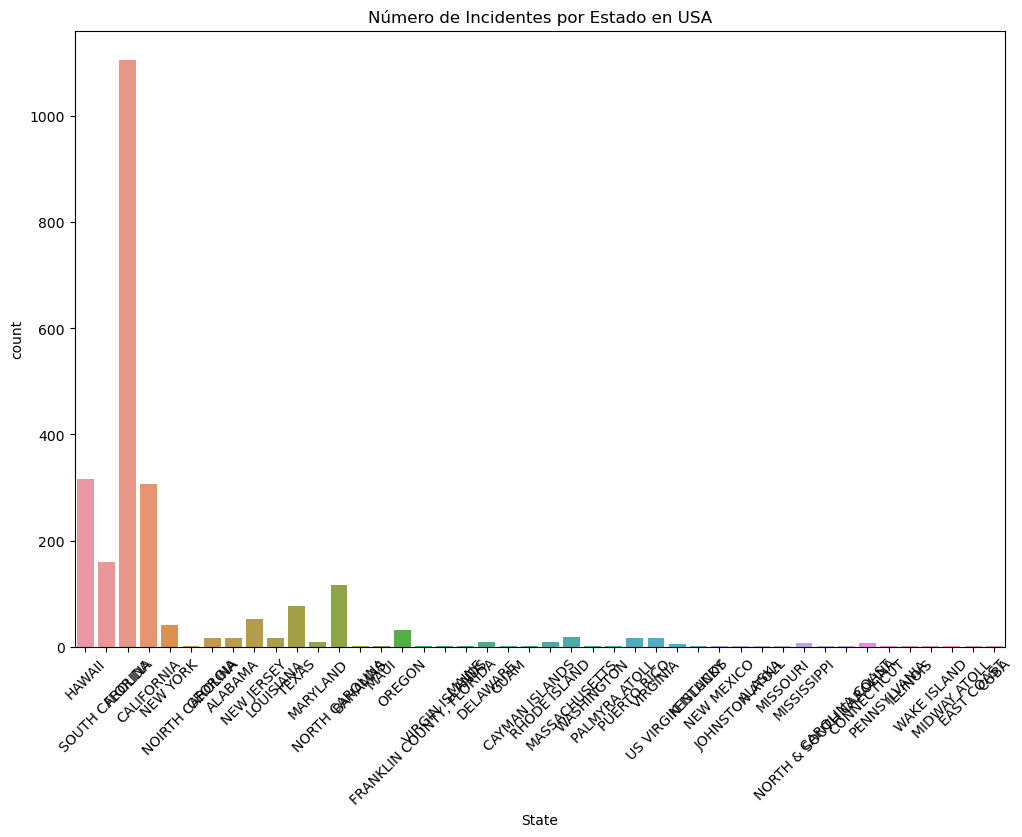

In [17]:
# Incidentes por Estado en un usa
usa_states = df[df['Country'] == 'usa']
plt.figure(figsize=(12, 8))
sns.countplot(data=usa_states, x='State')
plt.title('Número de Incidentes por Estado en USA')
plt.xticks(rotation=45)
plt.show()

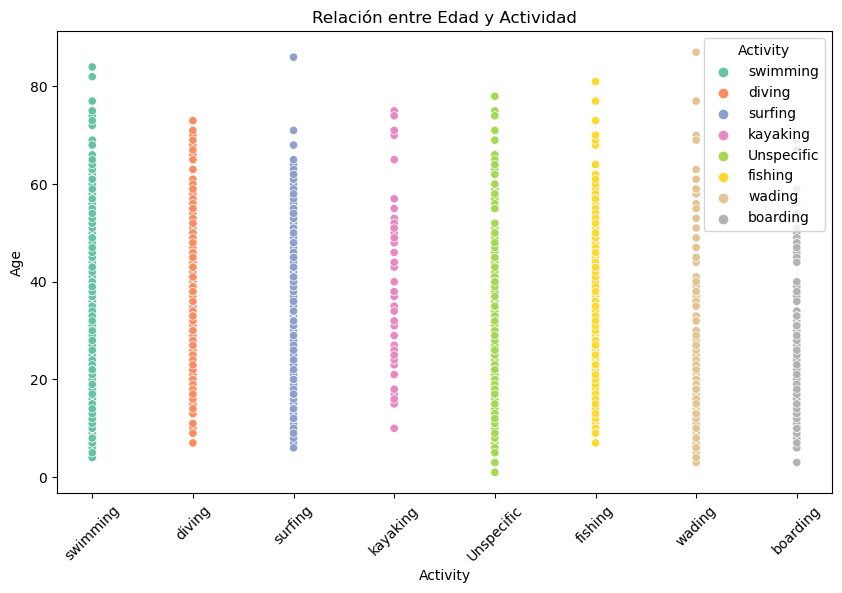

In [18]:
# 6. Relación entre Edad y Actividad
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Set2')
plt.title('Relación entre Edad y Actividad')
plt.xticks(rotation=45)
plt.show()

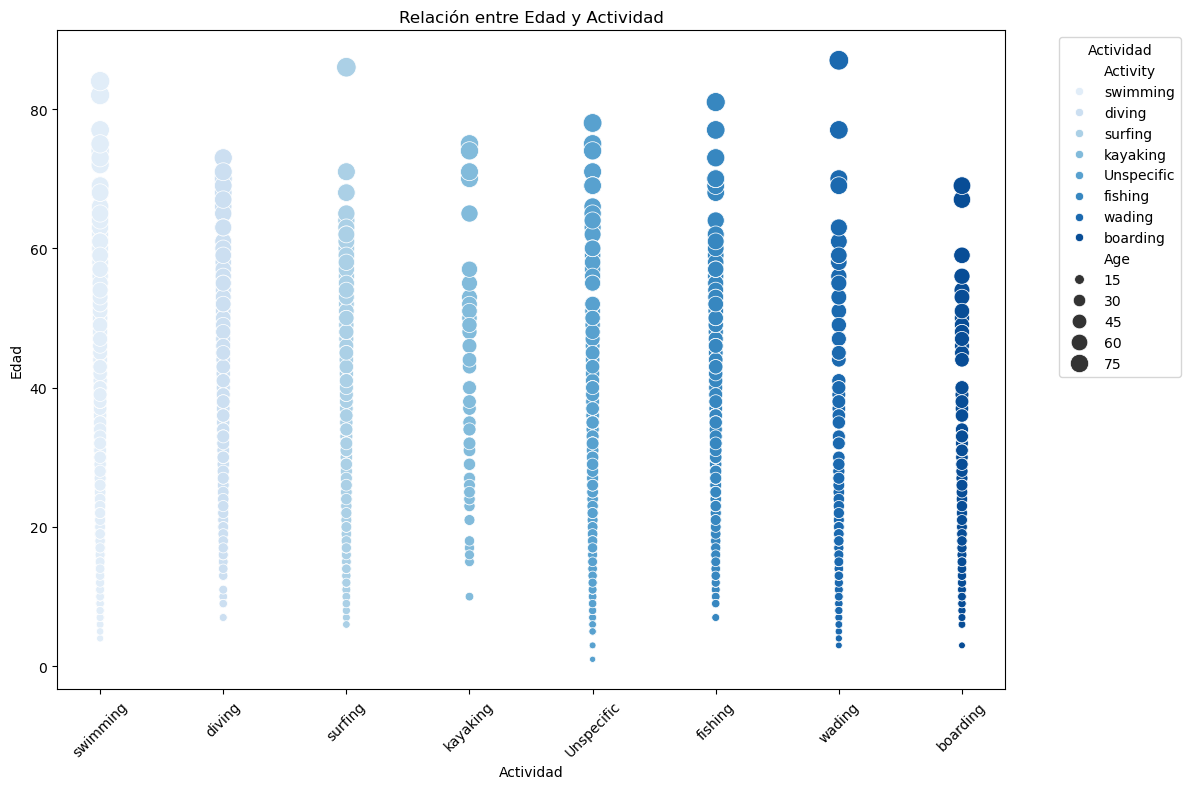

In [37]:
# PRUEBA OCTAVO GRÁFICO
# ES CASI IGUAL QUE EL DE ARRIBA PERO CON CÍRCULOS MÁS GRANDES O PEQUEÑOS

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Blues', size='Age', sizes=(20, 200))
plt.title('Relación entre Edad y Actividad')
plt.xlabel('Actividad')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.legend(title='Actividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/fp/jszwfm992pqbnc932hlygpjr0000gn/T/ipykernel_22524/1763319487.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Activity', y='Age', palette='Blues')


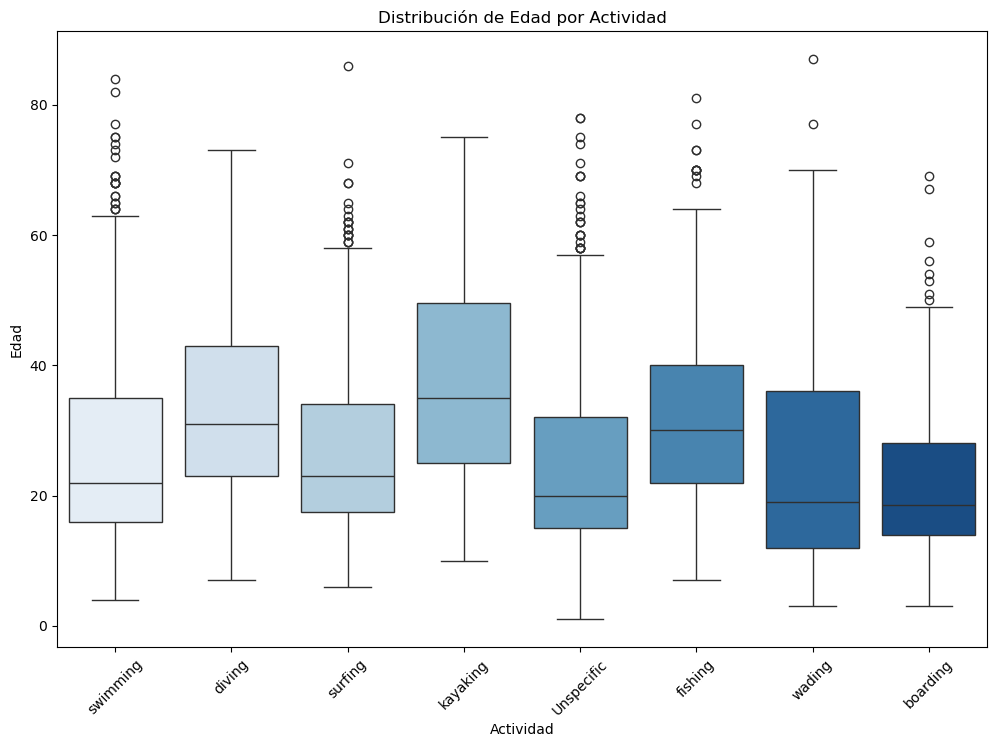

In [38]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Activity', y='Age', palette='Blues')
plt.title('Distribución de Edad por Actividad')
plt.xlabel('Actividad')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

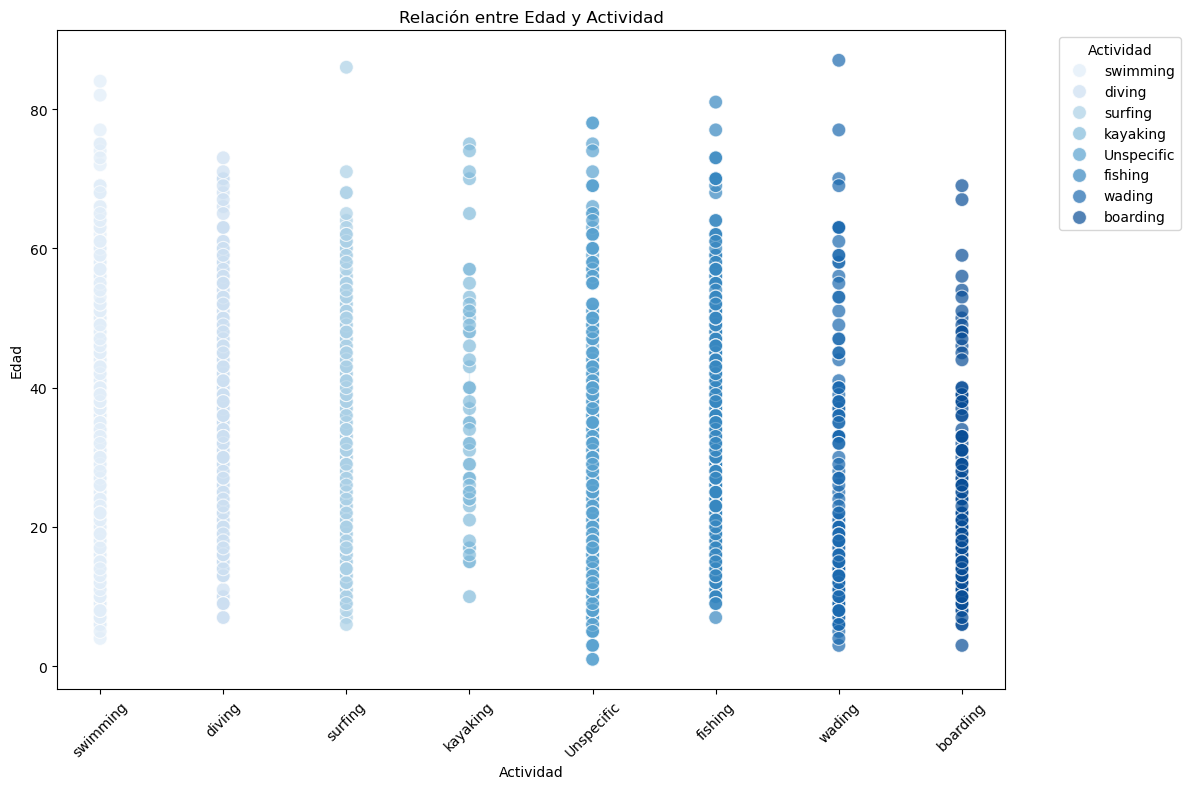

In [39]:
# Crear el gráfico de dispersión con ajuste de tendencia
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Activity', y='Age', hue='Activity', palette='Blues', s=100, edgecolor='w', alpha=0.7)
sns.lineplot(data=df, x='Activity', y='Age', hue='Activity', palette='Blues', estimator='mean', linewidth=2.5, legend=None)
plt.title('Relación entre Edad y Actividad')
plt.xlabel('Actividad')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.legend(title='Actividad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()